In [1]:
from keras.datasets import mnist
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#Convolution functions
def kernelconvolution(image,kernel):
    idim = image.shape
    kdim = kernel.shape
    output = np.array([[]])
    
    for i in range(idim[0]-kdim[0]):
        
        column = np.array([[]])
        for j in range(idim[1]-kdim[1]):
            
            temp = image[i:i+kdim[0],j:j+kdim[1]]


def convolve(image,kernel):
    #image and kernel need to be the same size
    im = image.flatten()
    ke = kernel.flatten()
    
    output = 0
    for i,j in zip(im,ke):
        output += i*j
        
    if sum(ke) != 0:
        output = output/sum(ke)
    
    return output #normalizes result

def kernelconvolution(image,kernel):
    idim = image.shape
    kdim = kernel.shape
    
    xd = idim[0]-kdim[0]
    yd = idim[1]-kdim[1]
    
    output = np.zeros((xd,yd))
        
    for i in range(xd):     
        for j in range(yd):
            
            temp = image[i:i+kdim[0],j:j+kdim[1]]
            c = convolve(temp,kernel)
            output[i,j] = c

    return output

def sobbel(image,edgex,edgey):
    outx = kernelconvolution(image,edgex)
    outy = kernelconvolution(image,edgey)
    out = (outx**2 + outy**2)**0.5
    
    return out
            

In [3]:
#Layer classes
class Layer_Dense(object):
    def __init__(self, n_inputs, n_neurons):
    
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons) #randn = gauss at 0
        self.biases = np.zeros((1, n_neurons))
        
        #could automate this by simply passing in inputs and neural network initializing itself....
        
        

    def forward(self, inputs):
        #takes inputs and returns the outputs of the layer in the same form
        
        # #could check shape of inputs
        # if inputs.shape[1] not self.weights.shape[0]:
        #     return("incorrect dimensions of input")
        
        self.output = np.dot(inputs,self.weights) + self.biases 

In [4]:
#Activation classes

class Activation_ReLU(object):
    def forward(self, inputs):
        self.output = np.maximum(0,inputs)

class Activation_Softmax(object):
    def forward(self, inputs):
        exp_values = (np.exp(inputs - np.max(inputs,axis = 1, keepdims = True)))
        prob = exp_values/np.sum(exp_values,axis = 1, keepdims = True)
        self.output = prob


In [11]:
#Loss classes
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output,y) #returns list of costs of each output
        
        #forward will depend on type of loss calculation
        data_loss = np.mean(sample_losses)
        return data_loss
    
class Loss_Crossentropy(Loss):
    def forward(self, y_hat, y):
        #y_pred = matrix of prediction
        #y_true = either matrix of 1 hot encoded or vector of scalar class results
        

        y_hat_clipped = np.clip(y_hat, 1e-7, 1-1e-7)
        
        #calcualting ce depends on how y_true is passed in
        if len(y.shape) == 1:
            #scalar encoding of y_true
            
            #np.log naturaly does row wise operations...
            ce = -np.log(y_hat_clipped[range(len(y)),y]) #indexing using range important
            
        elif len(y.shape) == 2:
            #onehot encoding
            ce = sum(np.log(y_hat*y),axis = 1)
            
        return ce #returns list of log likelihoods for each sample input

class Loss_Accuracy(Loss):
    def forward(self,y_hat,y):
        samples= len(y_hat)
        
        #*No need to clip here technically
        predictions = np.argmax(y_hat, axis = 1)
        
        if len(y.shape) == 1:
            #scalar encoding (from 0)
            b_table = [i == y[x] for i,x in enumerate(predictions)]
            
        if len(y.shape) == 2:
            #one hot encoding
            b_table = [y[i,predictions[i]] for i in range(samples)]
            
        return b_table

class Loss_SS(Loss):
    #sum of squares
    def forward(self, y_hat, y):
        samples = len(y_pred)
        
        #make it robust to form of y_ture
        if len(y_true.shape) == 1:
            #scalar encoding
            #flip true value
            y_pred[y_true] = 1 - y_pred[y_true]
            SS = sum(y_pred**2, axis = 1)
        elif len(y_true.shape) == 2:
            #one hot encoding
            SS = sum( (y_pred - y_true)**2, axis = 1)
        
        return SS #returns the squared values of squares


In [6]:
#Loading in the MNIST dataset
(X, Y), (test_x, test_y) = mnist.load_data()

In [20]:
#testing
l = Loss_SS()
l.calculate(np.array([[0.5,0.1,0.2]]),np.array([[1,0,0]]))

len(X[0].flatten())

784

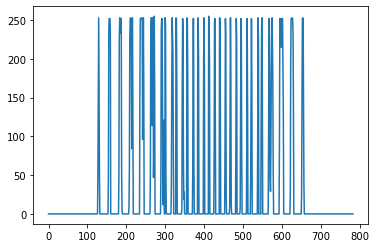

In [10]:
#CODE!
plt.plot(X[1].flatten())


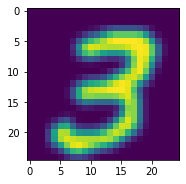

In [8]:
#plotting 
fig = plt.figure(figsize = (2.8,2.8))
ax0 = plt.subplot()

image = X[7]/255
#manually input kernel 
vert = np.array([[0,1,0],[0,1,0],[0,1,0]])
gauss = np.array([[1,2,1],[2,4,2],[1,2,1]])
edgex = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
edgey = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
kernel = gauss

#image = kernelconvolution(image,gauss)

#number of transformations
t = 1
for i in range(t):
    image = kernelconvolution(image,kernel)


ax0.imshow(image)
